In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt                    # importing necessary libraries
%matplotlib inline
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Parkinsson disease.csv')         # loading the dataset

In [3]:
df.head()                                          # looking first 5 row

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Hypothesis

#### 1.1) Null Hypothesis

In [4]:
feature_pd = df[df['status'] == 1]['MDVP:Jitter(%)']
feature_non_pd = df[df['status'] == 0]['MDVP:Jitter(%)']

t_stat, p_value = ttest_ind(feature_pd, feature_non_pd, equal_var=False) 

alpha = 0.05

print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Null hypothesis rejected: MDVP:Jitter(%) helps determine the presence of Parkinson's disease.")
else:
    print("Fail to reject null hypothesis: No significant evidence that MDVP:Jitter(%) helps determine Parkinson's disease.")

T-test statistic: 5.958777231797448
P-value: 1.23881953332809e-08
Null hypothesis rejected: MDVP:Jitter(%) helps determine the presence of Parkinson's disease.


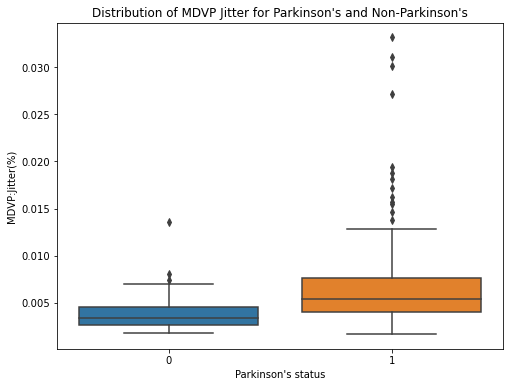

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='MDVP:Jitter(%)', data=df)
plt.xlabel("Parkinson's status")
plt.ylabel("MDVP:Jitter(%)")
plt.title("Distribution of MDVP Jitter for Parkinson's and Non-Parkinson's")
plt.show()

#### 1.2) Shapiro Wilk test

In [6]:
data_to_test = df[df['status']==1]['MDVP:Jitter(%)']
stat, p=shapiro(data_to_test)
print('stat=%.2f, p=%.30f' % (stat,p))
if p > 0.05:
    print('Normal distribution')

else:
    print('Not a Normal Distribution')    

stat=0.69, p=0.000000000000000435251506306428
Not a Normal Distribution


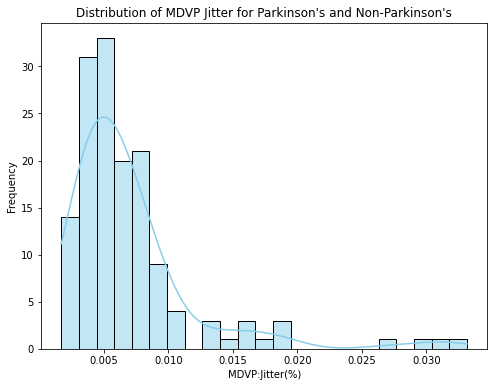

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['status']==1]['MDVP:Jitter(%)'], kde=True, color='skyblue')
plt.xlabel("MDVP:Jitter(%)")
plt.ylabel("Frequency")
plt.title("Distribution of MDVP Jitter for Parkinson's and Non-Parkinson's")
plt.show()

#### 1.3) Predictive Hypothesis-Linear Regression

In [8]:
X = df[['MDVP:Jitter(%)']]  
y = df['status']  


model_lr = LinearRegression()
model_lr.fit(X, y)


r_squared = model_lr.score(X, y)

threshold = 0.5  

print(f"R-squared: {r_squared}")

if r_squared > threshold:
    print("Predictive hypothesis supported: MDVP:Jitter(%) has a strong correlation/predictive power for Parkinson's status.")
else:
    print("Predictive hypothesis not supported: MDVP:Jitter(%) might have weak predictive power for Parkinson's status.")

R-squared: 0.07740614486669373
Predictive hypothesis not supported: MDVP:Jitter(%) might have weak predictive power for Parkinson's status.


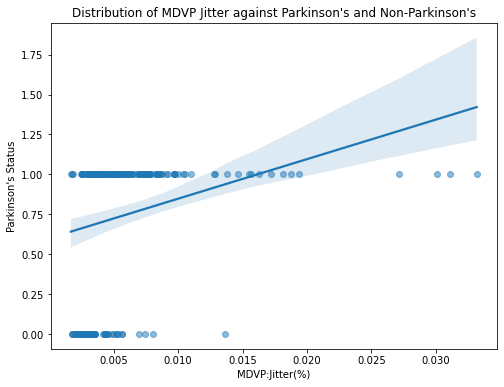

In [9]:
plt.figure(figsize=(8,6))
sns.regplot(x='MDVP:Jitter(%)', y='status', data=df, scatter_kws={'alpha':0.5})
plt.xlabel("MDVP:Jitter(%)")
plt.ylabel("Parkinson's Status")
plt.title("Distribution of MDVP Jitter against Parkinson's and Non-Parkinson's")
plt.show()

### 2. EDA

In [10]:
df.isnull().sum()                                  # checking for null values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
df.shape           # checking for no of rows and columns

(195, 24)

In [12]:
df.info()          # checking for data types of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
df.describe().T       # checking for stats of each columns

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [14]:
df.columns          # columns name

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [15]:
df.notnull()            # true indicates their is no null value is present in our dataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
191,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
192,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
193,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [16]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [17]:
df['status'].value_counts()  

1    147
0     48
Name: status, dtype: int64

In [18]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


### 3. DATA PREPROCESSING

In [19]:
X = df.drop(columns=['name', 'status'], axis = 1)    # seperating features and target variabe
Y = df['status']


In [20]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


### 4. DATA VISUALIZATION

#### 4.1 Univariate Analysis

<AxesSubplot:xlabel='status', ylabel='count'>

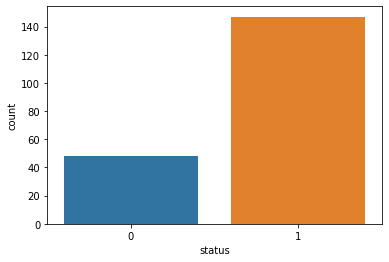

In [22]:
sns.countplot(df['status'])       # 1 indicates that person has parkinson disease
                                  # 0 indicates that person does not have parkinson disease

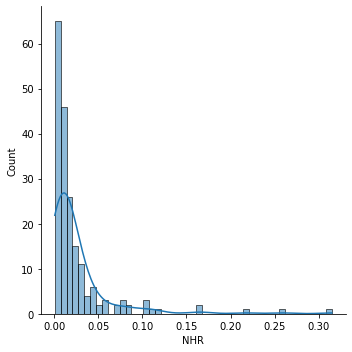

In [23]:
sns.displot(df['NHR'], kde=True)

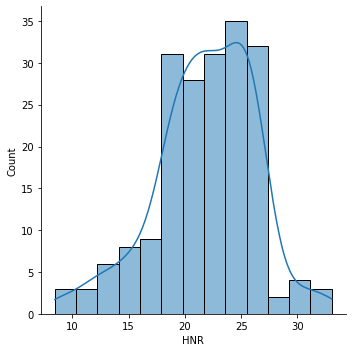

In [24]:
sns.displot(df['HNR'], kde=True)

In [25]:
# features
x = df.loc[:,df.columns!='status'].values[:,1:]
x1 = df.loc[:,df.columns!='status']
# label
y = df.loc[:,'status'].values
y1 = df.loc[:,'status']

status
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

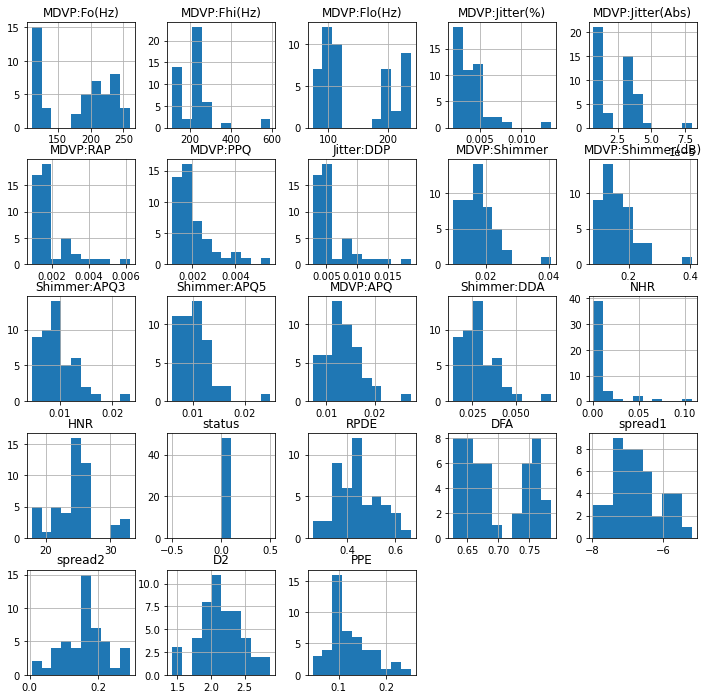

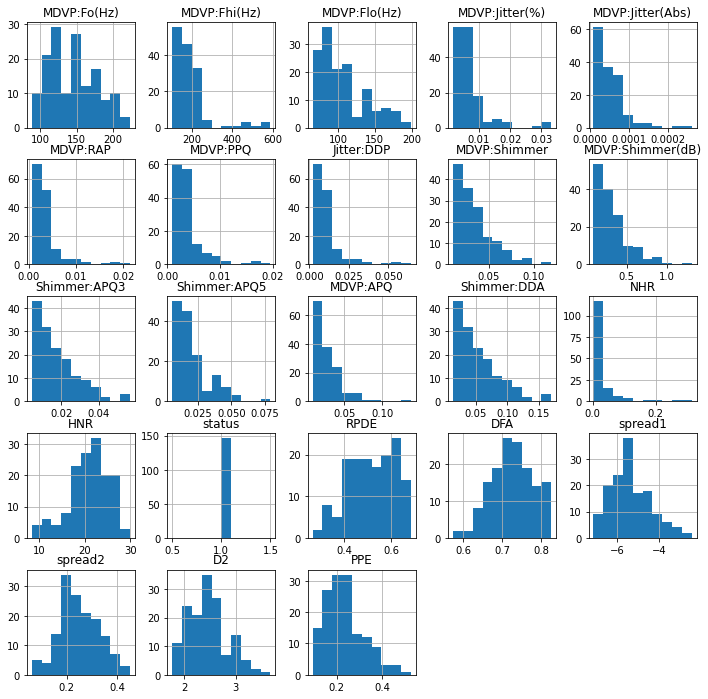

In [26]:
df.groupby('status').hist(figsize=(12, 12))

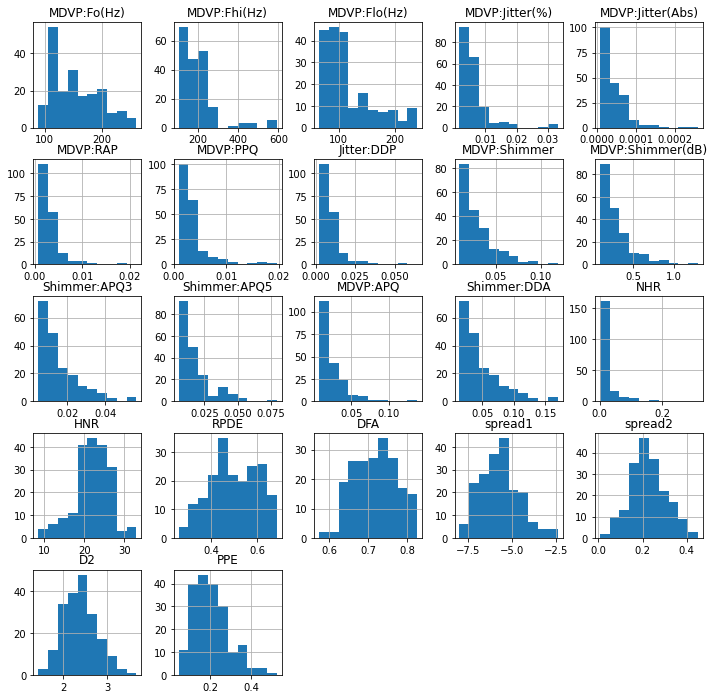

In [27]:
x1.hist(figsize=(12,12))
plt.show()

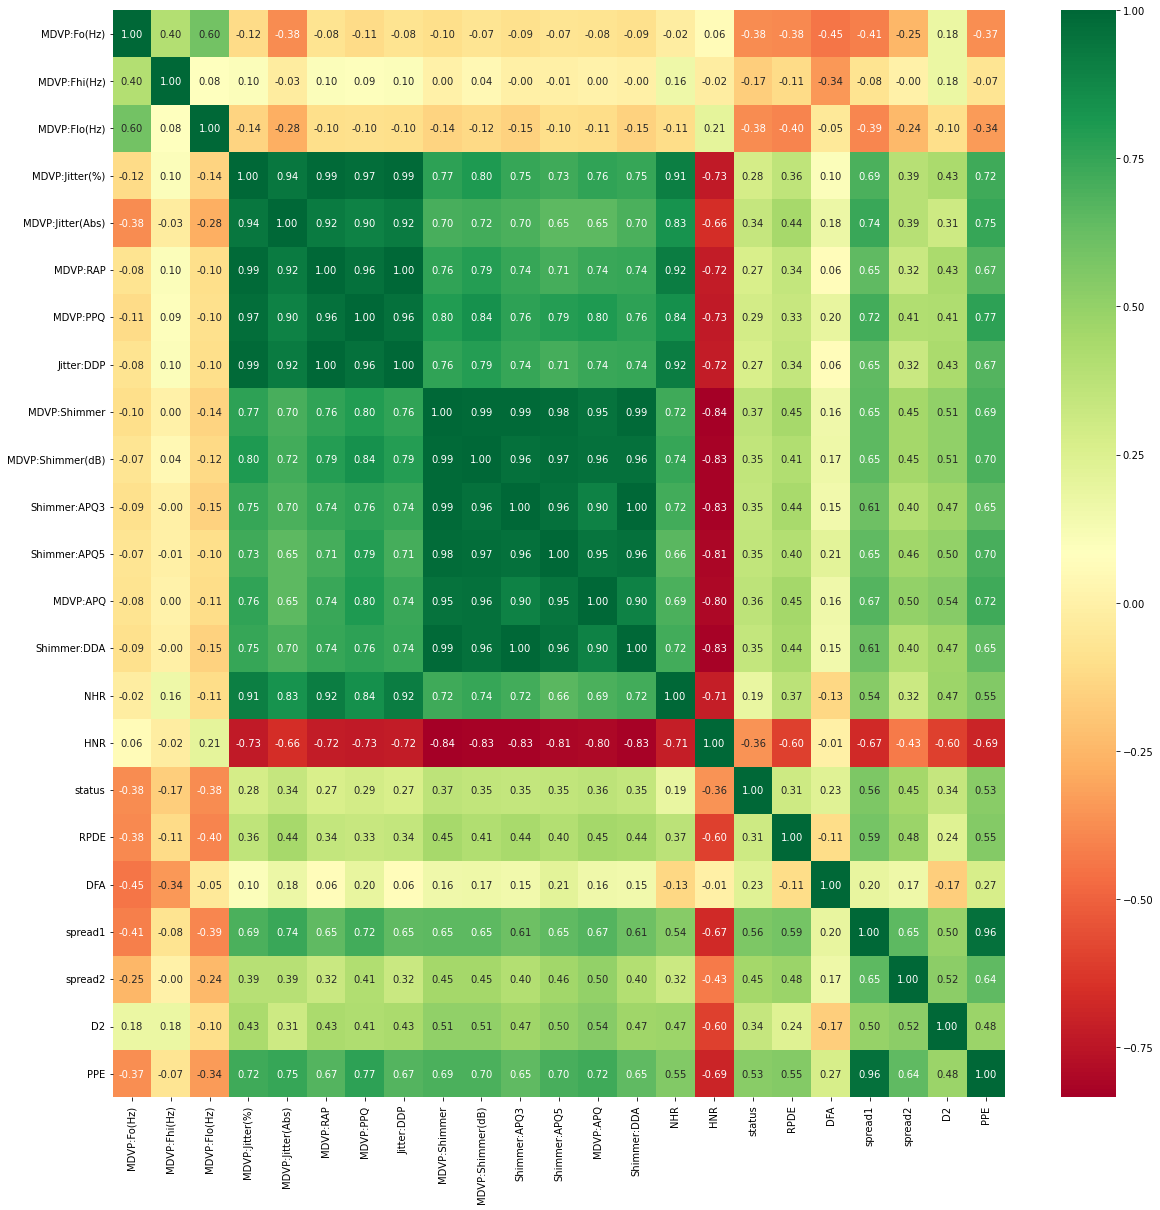

In [28]:
plt.figure(figsize=(20, 20))

# correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap="RdYlGn")


#### 4.2 Bivariate Analysis

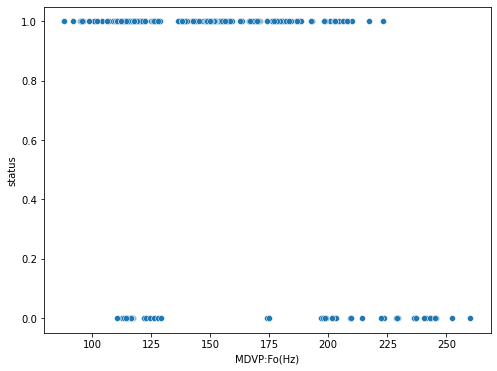

In [29]:
feature = 'MDVP:Fo(Hz)'
target = 'status'

plt.figure(figsize=(8,6))
sns.scatterplot(x=feature, y=target, data = df)
plt.show()

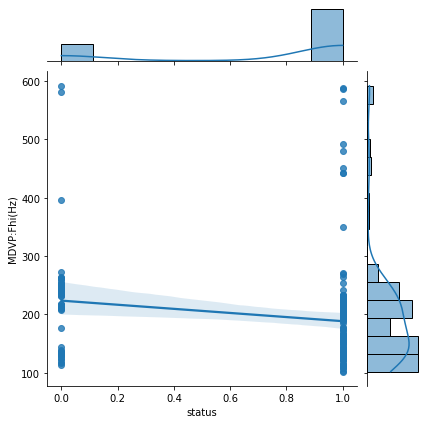

In [30]:
sns.jointplot(x='status', y='MDVP:Fhi(Hz)', data=df, kind='reg')

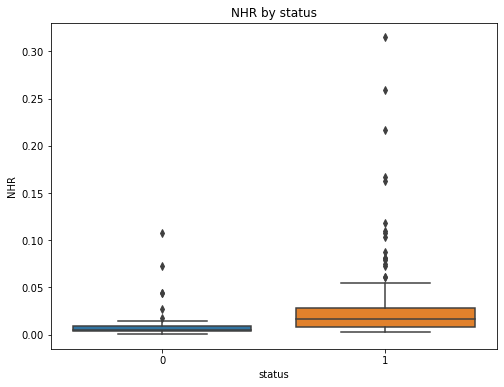

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='NHR', data=df)
plt.title('NHR by status')
plt.xlabel('status')
plt.ylabel('NHR')
plt.show()

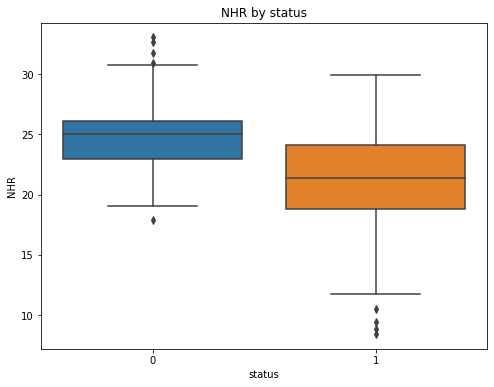

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='HNR', data=df)
plt.title('NHR by status')
plt.xlabel('status')
plt.ylabel('NHR')
plt.show()

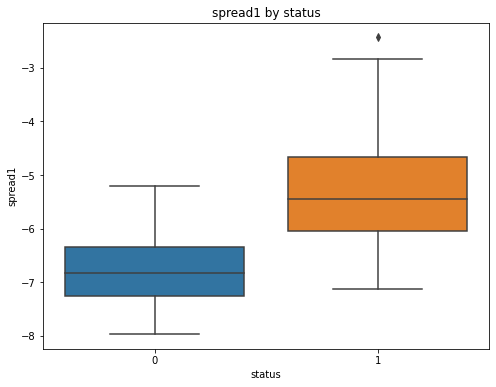

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='spread1', data=df)
plt.title('spread1 by status')
plt.xlabel('status')
plt.ylabel('spread1')
plt.show()

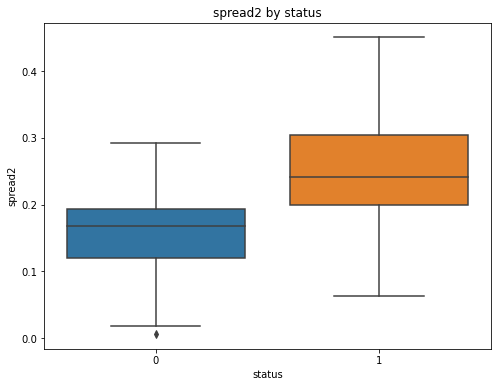

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='spread2', data=df)
plt.title('spread2 by status')
plt.xlabel('status')
plt.ylabel('spread2')
plt.show()

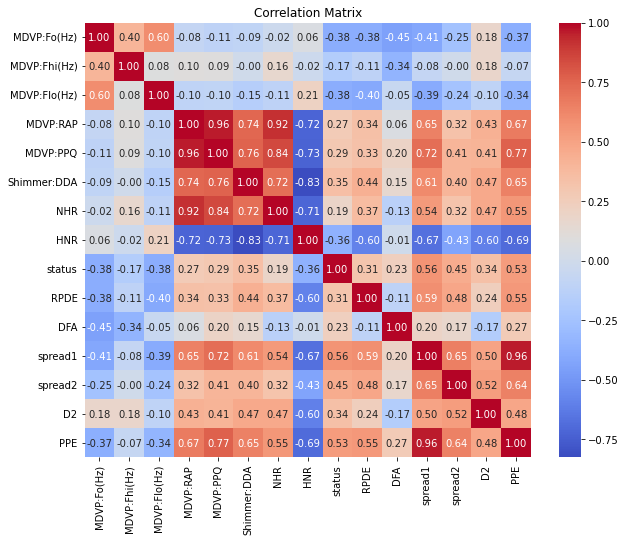

In [35]:
numeric_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 
                   'MDVP:RAP', 'MDVP:PPQ',  'Shimmer:DDA', 
                   'NHR', 'HNR', 'status', 'RPDE', 'DFA',
                   'spread1', 'spread2', 'D2', 'PPE']
                                                              #numeric columns correlation
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 5. Feature Selection

In [36]:
features=df.loc[:,df.columns!='status'].values[:,1:]

labels=df.loc[:,'status'].values

In [37]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

### 6. Building the classifiers and choosing the best

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, stratify= y, random_state = 2)
print(x.shape, x_train.shape, x_test.shape)

(195, 22) (175, 22) (20, 22)


In [39]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [40]:
models = {
    "Linear Regression"     : LinearRegression(),
    "K-Nearest Neighbor"  : KNeighborsClassifier(),
    "Decision Tree"         : DecisionTreeClassifier(),
    "Random Forest "        : RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression"   : LogisticRegression(),
    "XGBClassifier"         : XGBClassifier()
    
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3100
- Mean Absolute Error: 0.2409
- R2 Score: 0.4816
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2921
- Mean Absolute Error: 0.2491
- R2 Score: 0.5449


K-Nearest Neighbor
Model performance for Training set
- Root Mean Squared Error: 0.1852
- Mean Absolute Error: 0.0343
- R2 Score: 0.8150
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3162
- Mean Absolute Error: 0.1000
- R2 Score: 0.4667


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2236
- Mean Absolute Error: 0.0500
- R2 Score: 0.7333


Random Forest 
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
---------

In [41]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
6,XGBClassifier,1.000000
2,Decision Tree,0.733333
3,Random Forest,0.733333
0,Linear Regression,0.544856
1,K-Nearest Neighbor,0.466667
5,Logistic Regression,0.466667
4,Support Vector Machine,0.200000


In [42]:
xgbc_model = XGBClassifier()
xgbc_model = xgbc_model.fit(x_train, y_train)
y_pred = xgbc_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


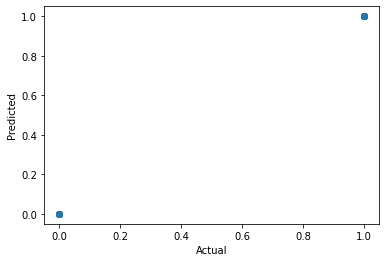

In [43]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

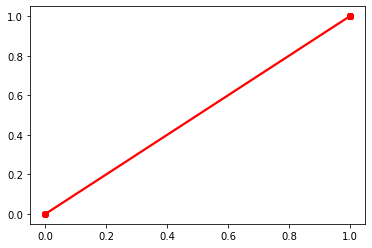

In [44]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### 7. Hyperparameter Tuning

In [45]:
xgb = XGBClassifier()
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001], 
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7], 
}

# Creating GridSearchCV instance for XGBClassifier with the defined parameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Accuracy Score: 0.9142857142857144
